### Solving equations with Python
Let's first do some symbolic computation. We need to import `sympy` first. 

**Should your imports be in a single cell at the top or should they appear as they are used?** There's not a single valid best practice. Most people seem to prefer imports at the top of the file though. **Note: If you write new code in a cell, you have to re-execute it!**

Let's use `sympy` to give us a quick symbolic solution to our equation. First import `sympy` (you can use the second cell in this notebook): 
```python 
import sympy 
```

Next, create symbols for all variables and parameters. You may prefer to do this in one pass or separately:
```python 
x = sympy.symbols('x')
a, b, c = sympy.symbols('a b c')
```

Now solve:
```python 
sympy.solve(a * x**2 + b * x + c)
```

In [40]:
import sympy as sp  # Sympy is a library for symbolic mathematics in Python.
import cmath        # Needed for work with complex numbers
import math

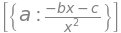

In [41]:
# Define the equation parameters
x, a, b, c = sp.symbols('x a b c')

# Define the equation
quadratic = a*x**2 + b*x + c

# Instruct sympy to visualize all prints in LaTex format.
sp.init_printing()

# Solve the equation.
sp.solve(quadratic)

Hmmmm... we didn't expect that :(. We got an expression for $a$ because the library tried to solve for the first symbol it saw. This is an equation and we have to solve for $x$. We can provide it as a second parameter:
```python 
sympy.solve(a * x**2 + b * x + c, x)
```

To finish off, if we start with `sympy.init_printing()`, we'll get a LaTeX-formatted result instead of a typed one. This is very useful because it produces better-looking formulas.

**Note:** This means we have to add the line BEFORE we start working with `sympy`. TYou mitght need to restart (and re-execute) all cells for this change to take effect.

In [42]:
# Solve the equation.
sp.solve(quadratic, x)

In [43]:
# Disable the pretty print (we don't need it in the next problems).
sp.init_printing(pretty_print=False)

How about a function that takes $a,\ b,\ c$ (assume they are real numbers, you don't need to do additional checks on them) and returns the **real** roots of the quadratic equation?

Remember that in order to calculate the roots, we first need to see whether the expression under the square root sign is non-negative.

If $b^2 - 4ac > 0$, the equation has two real roots: $x_1, x_2$

If $b^2 - 4ac = 0$, the equation has one real root: $x_1 = x_2$

If $b^2 - 4ac < 0$, the equation has zero real roots

Write a function which returns the roots. In the first case, return a list of 2 numbers: `[2, 3]`. In the second case, return a list of only one number: `[2]`. In the third case, return an empty list: `[]`.

In [44]:
def solve_quadratic_equation(a: float, b: float, c: float) -> list:
    """
    Returns the real solutions of the quadratic equation ax^2 + bx + c = 0\n
    Returns an *empty* array in case the discriminant is negative.\n
    Returns an array with 1 float number in case the discriminant is equal to 0.\n
    Returns an array with 2 float numbers in case the discriminant is positive.

    Args:
      a (float): Real number
      b (float): Real number
      c (float): Real number

    Returns:
      solutions (list): List of solutions for x
    """
    # Define a helper function for calculating x
    def calc_x(a: float, b: float, discr: float, sign: int = 1) -> float:
        return (-b + sign * math.sqrt(discr))/(2*a)

    # Calculate the discriminant.
    discr: float = b**2 - 4 * a * c
    # CASE 1: negative discriminant => no solutions
    if discr < 0:
        return []
    # CASE 2: non-negative discriminant, but a == 0 (BONUS 1)
    if a == 0:
        return [-c/b]
    # CASE 3: non-negative discriminant and non-zero a => a list of 2 solutions (the two values might be the same)
    solutions = [calc_x(a, b, discr), calc_x(a, b, discr, -1)]
    # Eliminate the duplicated solutions by converting list->set->list. Lastly, sort the output list (in case there are 2 solutions).
    return sorted(list(set(solutions)))

In [45]:
# Testing: Execute this cell. The outputs should match the expected outputs. Feel free to write more tests
print(solve_quadratic_equation(1, -1, -2))  # [-1.0, 2.0]
print(solve_quadratic_equation(1, -8, 16))  # [4.0]
print(solve_quadratic_equation(1, 1, 1))    # []

[-1.0, 2.0]
[4.0]
[]


**Bonus 1:** Last time we saw how to solve a linear equation. Remember that linear equations are just like quadratic equations with $a = 0$. In this case, however, division by 0 will throw an error. Extend your function above to support solving linear equations as well.

In [46]:
print(solve_quadratic_equation(0, -1, -2))  # [-2.0]
print(solve_quadratic_equation(0, 1, 1))    # [-1.0]

[-2.0]
[-1.0]



**Bonus 2:** Actually, every quadratic equation (with a non-zero leading term $a$) has exactly two solutions. Find out what they are, why there are two of them, and how to compute them. If you've followed the steps outlined above, _you should add a single letter_ somewhere in your code to always obtain the two solutions to the quadratic equation.

In [47]:
# BONUS 2 implementation (using complex numbers)
def solve_quadratic_equation_for_complex(a: complex, b: complex, c: complex) -> list[complex, complex]:
    """
    Returns the complex solutions of the quadratic equation ax^2 + bx + c = 0

    Args:
      a (float): Complex number
      b (float): Complex number
      c (float): Complex number

    Returns:
      solutions (list): List of solutions for x. There are always two solutions, even if the discriminant is negative. 
      However, the two solutions might have the same value.
    """
    # Calculate the discriminant.
    discr: complex = b**2 - 4 * a * c
    # Calculate the two solutions
    solutions = [(-b + cmath.sqrt(discr))/(2*a), (-b - cmath.sqrt(discr))/(2*a)]
    # Eliminate the duplicated solutions by converting list->set->list.
    return sorted(solutions, key=abs)  # or  np.sort_complex(solutions)

In [48]:
print(solve_quadratic_equation_for_complex(1, -1, -2)) # [-1.0j, 2.0j]
print(solve_quadratic_equation_for_complex(1, -8, 16)) # [(4+0j), (4+0j)]
print(solve_quadratic_equation_for_complex(1, 1, 1)) # [(-0.5-0.8660254037844386j), (-0.5+0.8660254037844386j)]

[(-1+0j), (2+0j)]
[(4+0j), (4+0j)]
[(-0.5+0.8660254037844386j), (-0.5-0.8660254037844386j)]
